### Muat (Load) Data Berlabel

In [6]:
import pandas as pd

labeled_data = pd.read_csv('/content/data_manual.csv')
labeled_data.head()

,app_name,rating,review,preprocessed_text,Label
0,Duolingo,5,duolingo mengajariku bahasa Jepang sekarang ak...,ajar bahasa jepang paham bahasa jepang,Positif
1,Duolingo,5,"bagus,bisa untuk belajarr",bagus ajar,Positif
2,Duolingo,5,"sangat melatih, aplikasinya juga bagus",latih aplikasi bagus,Positif
3,Duolingo,5,sangat seru terasa bermain tapi menambah ilmu ...,seru main tambah ilmu suka banget,Positif
4,Duolingo,5,cara mudah belajar bahasa sangat mantap,mudah ajar bahasa mantap,Positif


In [7]:
# Tampilkan informasi dasar data
print("\nInformasi Data:")
labeled_data.info()

# Cek distribusi label
print("\nDistribusi Label:")
print(labeled_data['Label'].value_counts())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   app_name           300 non-null    object
 1   rating             300 non-null    int64 
 2   review             300 non-null    object
 3   preprocessed_text  300 non-null    object
 4   Label              300 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.8+ KB

Distribusi Label:
Label
Positif    150
Negatif    150
Name: count, dtype: int64


### Pra-pemrosesan Data dan Pemisahan Data Latih-Uji (Train-Test Split)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Definisikan fitur (X) dan target (y)
X = labeled_data['preprocessed_text']
y = labeled_data['Label']

# Encode label 'positif'/'negatif' menjadi 1/0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian (misal: 80% latih, 20% uji)
# `stratify=y_encoded` penting untuk menjaga proporsi label di setiap set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Ukuran data pelatihan: {len(X_train)} baris")
print(f"Ukuran data pengujian: {len(X_test)} baris")
print(f"Label yang di-encode: {label_encoder.classes_} menjadi {label_encoder.transform(label_encoder.classes_)}")


Ukuran data pelatihan: 240 baris
Ukuran data pengujian: 60 baris
Label yang di-encode: ['Negatif' 'Positif'] menjadi [0 1]


### Vektorisasi Teks Menggunakan TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur untuk performa lebih baik

# Latih vectorizer pada data pelatihan dan transformasikan data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformasikan data pengujian menggunakan vectorizer yang sudah dilatih
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Dimensi data pelatihan setelah TF-IDF: {X_train_tfidf.shape}")
print(f"Dimensi data pengujian setelah TF-IDF: {X_test_tfidf.shape}")


Dimensi data pelatihan setelah TF-IDF: (240, 683)
Dimensi data pengujian setelah TF-IDF: (60, 683)


### Latih Model Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' cocok untuk dataset kecil

# Latih model
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Evaluasi Performa Model

Akurasi Model pada Data Uji: 0.9000

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.90      0.90        30
     Positif       0.90      0.90      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



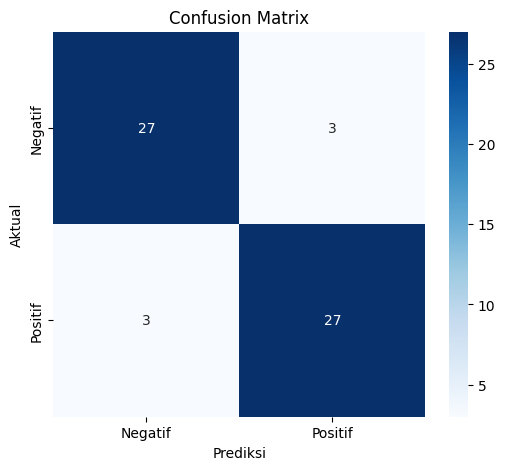

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test_tfidf)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Uji: {accuracy:.4f}")

# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
# Pastikan label_encoder.classes_ digunakan untuk laporan agar lebih mudah dibaca
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


### Simpan Model Terlatih dan Vectorizer Anda

In [21]:
import joblib

joblib.dump(model, '/content/sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, '/content/tfidf_vectorizer.pkl')
joblib.dump(label_encoder, '/content/label_encoder.pkl')

print("Model, TF-IDF Vectorizer, dan Label Encoder berhasil disimpan.")

Model, TF-IDF Vectorizer, dan Label Encoder berhasil disimpan.


### Muat (Load) Model, Vectorizer, dan Label Encoder yang Sudah Disimpan

In [22]:
import joblib
import pandas as pd

# Ganti '/content/' jika Anda menyimpannya di lokasi lain
try:
    loaded_model = joblib.load('/content/sentiment_model.pkl')
    loaded_tfidf_vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')
    loaded_label_encoder = joblib.load('/content/label_encoder.pkl')
    print("Model, TF-IDF Vectorizer, dan Label Encoder berhasil dimuat!")
except FileNotFoundError:
    print("Error: Satu atau lebih file tidak ditemukan. Pastikan path sudah benar.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat objek: {e}")


Model, TF-IDF Vectorizer, dan Label Encoder berhasil dimuat!


### Muat (Load) 700 Data yang Belum Berlabel

In [23]:
import pandas as pd

unlabeled_data = pd.read_csv('/content/tanpa_label.csv')
unlabeled_data.head()

,app_name,rating,review,preprocessed_text
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris
1,Duolingo,5,Bagus,bagus
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator
3,Duolingo,5,aplikasinya baik sekal,aplikasi
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay


### Pra-pemrosesan Data Baru dan Prediksi

In [24]:
if 'loaded_model' in locals() and 'loaded_tfidf_vectorizer' in locals() and 'loaded_label_encoder' in locals() and 'unlabeled_data' in locals() and not unlabeled_data.empty:
    try:
        # Ekstrak kolom 'preprocessed_text' dari data baru
        X_new_unlabeled = unlabeled_data['preprocessed_text']

        # Tangani nilai NaN: isi dengan string kosong agar TfidfVectorizer tidak error
        X_new_unlabeled = X_new_unlabeled.fillna('')

        # Transformasikan teks baru menggunakan vectorizer yang sudah dilatih
        X_new_tfidf = loaded_tfidf_vectorizer.transform(X_new_unlabeled)

        # Lakukan prediksi menggunakan model yang sudah dimuat
        new_predictions_encoded = loaded_model.predict(X_new_tfidf)

        # Ubah label numerik kembali ke label asli ('positif'/'negatif')
        new_predictions = loaded_label_encoder.inverse_transform(new_predictions_encoded)

        # Tambahkan hasil prediksi ke DataFrame data baru
        unlabeled_data['tf-idf_Logistic Regression'] = new_predictions

        print("Prediksi berhasil dilakukan pada data yang belum berlabel!")
        display(unlabeled_data.head())

        # Anda bisa menyimpan hasil prediksi ini ke file CSV baru
        predictions_output_path = '/content/data_self_training.csv'
        unlabeled_data.to_csv(predictions_output_path, index=False)
        print(f"Hasil prediksi disimpan ke '{predictions_output_path}'.")

    except Exception as e:
        print(f"Terjadi kesalahan saat memproses data baru atau melakukan prediksi: {e}")
        print("Pastikan semua objek telah dimuat dengan benar dan data baru memiliki kolom 'preprocessed_text'.")
else:
    print("Tidak dapat melakukan prediksi. Pastikan model, vectorizer, label encoder, dan data baru telah dimuat dengan benar.")


Prediksi berhasil dilakukan pada data yang belum berlabel!


,app_name,rating,review,preprocessed_text,tf-idf_Logistic Regression
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris,Positif
1,Duolingo,5,Bagus,bagus,Positif
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator,Negatif
3,Duolingo,5,aplikasinya baik sekal,aplikasi,Negatif
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay,Positif


Hasil prediksi disimpan ke '/content/data_self_training.csv'.


### Pelabelan Sentimen Menggunakan Fallback (Transformers / MultinomialNB)

In [25]:
import sys
!pip install transformers --quiet

import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer # Diperlukan jika MultinomialNB dilatih ulang

In [29]:
use_transformers = False
fallback_model_name = ""

# Pastikan unlabeled_data, X_train_tfidf, y_train, dan label_encoder tersedia
if 'unlabeled_data' not in locals() or unlabeled_data.empty:
    print("Error: `unlabeled_data` belum dimuat atau kosong. Pastikan Anda sudah menjalankan sel sebelumnya.")
    sys.exit()

if 'X_train_tfidf' not in locals() or 'y_train' not in locals() or 'label_encoder' not in locals():
    print("Error: Model TF-IDF atau data pelatihan untuk fallback belum tersedia. Pastikan Anda sudah menjalankan sel pra-pemrosesan data.")
    sys.exit()

X_unlabeled_text = unlabeled_data['preprocessed_text'].fillna('')

# List untuk menyimpan hasil prediksi
fallback_predictions_encoded = []

try:
    from transformers import pipeline
    print("Mencoba menggunakan pipeline sentiment-analysis dari transformers...")
    # Inisialisasi pipeline, biasanya ini mendukung 'positive', 'negative'
    # Jika Anda ingin 'netral', Anda mungkin perlu model yang berbeda atau fine-tuning.
    pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english") # Contoh model yang ringan
    use_transformers = True
    fallback_model_name = "Transformers (DistilBERT)"

    # Fungsi untuk prediksi menggunakan transformers
    def transformers_predict(texts, batch_size=32):
        predictions = []
        for i in range(0, len(texts), batch_size):
            batch_texts = list(texts[i:i+batch_size])
            outs = pipe(batch_texts)
            for o in outs:
                label = o['label'].upper()
                # Konversi ke label yang konsisten dengan Positif (1) dan Negatif (0)
                if label == 'POSITIVE':
                    predictions.append(1) # 'Positif'
                elif label == 'NEGATIVE':
                    predictions.append(0) # 'Negatif'
                else:
                    # Tangani kasus yang tidak terduga, misal 'NEUTRAL' jika model mendukung
                    # Untuk saat ini, kita bisa default ke Netral atau mengabaikannya
                    predictions.append(0) # Default ke negatif jika tidak dikenal atau netral (sesuai kebutuhan)
        return np.array(predictions)

    print("Melakukan prediksi menggunakan Transformers...")
    fallback_predictions_encoded = transformers_predict(X_unlabeled_text)

except Exception as e:
    print(f"Transformers tidak tersedia atau terjadi error ({e}). Fallback ke MultinomialNB.")
    use_transformers = False
    fallback_model_name = "MultinomialNB"

    # Train MultinomialNB model if transformers is not used
    # Note: We use the already trained tfidf_vectorizer from previous steps
    # and X_train_tfidf, y_train to train the Naive Bayes model.
    # If the user's snippet implied re-vectorizing, we'd need to adapt.

    # Ensure the tfidf_vectorizer is available
    if 'tfidf_vectorizer' not in locals():
        print("Error: `tfidf_vectorizer` belum tersedia. Pastikan Anda sudah menjalankan sel vektorisasi teks.")
        sys.exit()

    model_B = MultinomialNB() # Inisialisasi MultinomialNB
    model_B.fit(X_train_tfidf, y_train) # Latih model dengan data TF-IDF dan label

    print("Melakukan prediksi menggunakan MultinomialNB...")
    X_unlabeled_tfidf = tfidf_vectorizer.transform(X_unlabeled_text) # Transformasi teks baru
    fallback_predictions_encoded = model_B.predict(X_unlabeled_tfidf)

# Ubah label numerik kembali ke label asli ('positif'/'negatif')
if len(fallback_predictions_encoded) > 0:
    new_predictions_decoded = label_encoder.inverse_transform(np.array(fallback_predictions_encoded))
    unlabeled_data['transformers_sentiment'] = new_predictions_decoded
    print(f"Pelabelan selesai menggunakan {fallback_model_name}!")
    display(unlabeled_data.head())

    # Simpan hasil pelabelan
    output_path = '/content/data_self_training.csv'
    unlabeled_data.to_csv(output_path, index=False)
    print(f"Hasil pelabelan disimpan ke '{output_path}'.")
else:
    print("Tidak ada prediksi yang dihasilkan.")


Mencoba menggunakan pipeline sentiment-analysis dari transformers...


Device set to use cpu


Melakukan prediksi menggunakan Transformers...
Pelabelan selesai menggunakan Transformers (DistilBERT)!


,app_name,rating,review,preprocessed_text,tf-idf_Logistic Regression,transformers_sentiment
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris,Positif,Negatif
1,Duolingo,5,Bagus,bagus,Positif,Negatif
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator,Negatif,Negatif
3,Duolingo,5,aplikasinya baik sekal,aplikasi,Negatif,Positif
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay,Positif,Negatif


Hasil pelabelan disimpan ke '/content/data_self_training.csv'.
